# Analyzing Timings for Selections of the large chaperonin TRiC/CCT

This case study illustrates ways to speed up the analysis of a trajectory of a large complex, the chaperonin called TRiC or CCT or TRiC/CCT.

 ## 1. Default behaviour

We will first illustrate the default behaviour of :func:`.calcWaterBridgesTrajectory` and then illustrate some options that can speed up or slow down the analysis and how to assess the timing.

As usual, we start with the necessary imports. In this case, in addition to :mod:`prody`, we include :mod:`~time` for checking the current time.

In [1]:
from prody import *
import time

Next, we import the starting structure and the trajectory:

In [2]:
coords_traj = parsePDB('4a0v_all_sci.pdb')
trajectory = parseDCD('TricCCT_D2_4a0v_25ns_ev100th.dcd')

@> 707044 atoms and 1 coordinate set(s) were parsed in 8.24s.
@> DCD file contains 50 coordinate sets for 707044 atoms.
@> DCD file was parsed in 0.70 seconds.
@> 404.58 MB parsed at input rate 578.86 MB/s.
@> 50 coordinate sets parsed at input rate 71 frame/s.


We see that we have 50 frames and 707,044 atoms.

We can use the function :func:`~time.time()` to get the current time in seconds. We will then use this again either side of :func:`.calcWaterBridgesTrajectory` to see how long it took.

In [3]:
start_time = time.time()
start_time

1722740579.040046

In [4]:
start_time = time.time()
x = calcWaterBridgesTrajectory(coords_traj, trajectory)
calc_time = time.time() - start_time

@> Frame: 0
@> Frame: 1
@> Frame: 2
@> Frame: 3
@> Frame: 4
@> Frame: 5
@> Frame: 6
@> Frame: 7
@> Frame: 8
@> Frame: 9
@> Frame: 10
@> Frame: 11
@> Frame: 12
@> Frame: 13
@> Frame: 14
@> Frame: 15
@> Frame: 16
@> Frame: 17
@> Frame: 18
@> Frame: 19
@> Frame: 20
@> Frame: 21
@> Frame: 22
@> Frame: 23
@> Frame: 24
@> Frame: 25
@> Frame: 26
@> Frame: 27
@> Frame: 28
@> Frame: 29
@> Frame: 30
@> Frame: 31
@> Frame: 32
@> Frame: 33
@> Frame: 34
@> Frame: 35
@> Frame: 36
@> Frame: 37
@> Frame: 38
@> Frame: 39
@> Frame: 40
@> Frame: 41
@> Frame: 42
@> Frame: 43
@> Frame: 44
@> Frame: 45
@> Frame: 46
@> Frame: 47
@> Frame: 48
@> Frame: 49
@> 6050 water bridges detected using method chain for frame 18
@> 5955 water bridges detected using method chain for frame 3
@> 5909 water bridges detected using method chain for frame 4
@> 6017 water bridges detected using method chain for frame 23
@> 6064 water bridges detected using method chain for frame 21
@> 5988 water bridges detected using method cha

We see that the calculation is launched for many frames at once (with a maximum equal to half the CPUs on your system) and the results are returned in a random order. They are still collected into the list `x` in the correct order:

In [5]:
[len(item) for item in x[:10]]

[5677, 5956, 5992, 5955, 5909, 5988, 6292, 6039, 6119, 6077]

Looking at the time, we still see that it's quite long (e.g. 7 minutes on workstation with 224 cores, so it can use 50 at once):

In [6]:
calc_time

429.4794600009918

In [7]:
calc_time/60

7.157991000016531

## 2. Selecting regions and exploring parameters

Instead of analysing the whole system, there is an option to provide a :kwarg:`selstr` together with the :kwarg:`expand_selection` set to **True** to analyze a region expanded around a selection based on its maximum and minimum x, y and z coordinates.

We illustrate this for a single chain with `selstr=segname PROA`, which speeds up the calculation dramatically.

In [8]:
start_time = time.time()
x = calcWaterBridgesTrajectory(coords_traj, trajectory, 
                               selstr='segname PROA', 
                               expand_selection=True)
calc_time = time.time() - start_time

@> Frame: 0
@> Frame: 1
@> Frame: 2
@> Frame: 3
@> Frame: 4
@> Frame: 5
@> Frame: 6
@> Frame: 7
@> Frame: 8
@> Frame: 9
@> Frame: 10
@> Frame: 11
@> Frame: 12
@> Frame: 13
@> Frame: 14
@> Frame: 15
@> Frame: 16
@> Frame: 17
@> Frame: 18
@> Frame: 19
@> Frame: 20
@> Frame: 21
@> Frame: 22
@> Frame: 23
@> Frame: 24
@> Frame: 25
@> Frame: 26
@> Frame: 27
@> Frame: 28
@> Frame: 29
@> Frame: 30
@> Frame: 31
@> Frame: 32
@> Frame: 33
@> Frame: 34
@> Frame: 35
@> Frame: 36
@> Frame: 37
@> Frame: 38
@> Frame: 39
@> Frame: 40
@> Frame: 41
@> Frame: 42
@> Frame: 43
@> Frame: 44
@> Frame: 45
@> Frame: 46
@> Frame: 47
@> Frame: 48
@> Frame: 49
@> 838 water bridges detected using method chain for frame 0
@> 785 water bridges detected using method chain for frame 1
@> 820 water bridges detected using method chain for frame 2
@> 840 water bridges detected using method chain for frame 5
@> 784 water bridges detected using method chain for frame 4
@> 899 water bridges detected using method chain for fr

In [9]:
calc_time

290.9998633861542

With this substantially sped up system, we can now explore the influence of other parameters.

For example, we can limit the processes running at a time with :kwarg:`max_proc`:

In [11]:
start_time = time.time()
x = calcWaterBridgesTrajectory(coords_traj, trajectory, 
                               selstr='segname PROA', 
                               expand_selection=True,
                               max_proc=10)
calc_time = time.time() - start_time

@> Frame: 0
@> Frame: 1
@> Frame: 2
@> Frame: 3
@> Frame: 4
@> Frame: 5
@> Frame: 6
@> Frame: 8
@> Frame: 7
@> Frame: 9
@> 838 water bridges detected using method chain for frame 0
@> 820 water bridges detected using method chain for frame 2
@> 835 water bridges detected using method chain for frame 3
@> 840 water bridges detected using method chain for frame 5
@> 784 water bridges detected using method chain for frame 4
@> 785 water bridges detected using method chain for frame 1
@> 852 water bridges detected using method chain for frame 8
@> 953 water bridges detected using method chain for frame 9
@> 804 water bridges detected using method chain for frame 7
@> 899 water bridges detected using method chain for frame 6
@> Frame: 10
@> Frame: 11
@> Frame: 12
@> Frame: 13
@> Frame: 14
@> Frame: 15
@> Frame: 16
@> Frame: 17
@> Frame: 18
@> Frame: 19
@> 853 water bridges detected using method chain for frame 11
@> 821 water bridges detected using method chain for frame 12
@> 871 water bri

In [12]:
calc_time

405.922723531723

In [13]:
calc_time/60

6.765378725528717

## 3. Comparing run times for different selections

We can put this in a function to run multiple times and with different parameters.

We can then plot the run time for different selections.

To do this, we start by importing some more libraries. We also import the previous ones and the trajectory, so we can start afresh from here.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [15]:
from prody import *
import time

In [16]:
coords_traj = parsePDB('4a0v_all_sci.pdb')
trajectory = parseDCD('TricCCT_D2_4a0v_25ns_ev100th.dcd')

@> 707044 atoms and 1 coordinate set(s) were parsed in 7.99s.
@> DCD file contains 50 coordinate sets for 707044 atoms.
@> DCD file was parsed in 0.76 seconds.
@> 404.58 MB parsed at input rate 531.43 MB/s.
@> 50 coordinate sets parsed at input rate 65 frame/s.


We design the function to return both the interactions and the time

In [17]:
def main(coords_traj, trajectory, selstr, stop_frame=10, **kwargs):
    start_time = time.time()
    x = calcWaterBridgesTrajectory(coords_traj, trajectory, 
                                   stop_frame=stop_frame, 
                                   selstr=selstr, 
                                   expand_selection=True,
                                   **kwargs)
    calc_time = time.time() - start_time
    
    return x, calc_time

We can define a dictionary with different selections to try:

In [18]:
sel_name_dict = {'segname PROA': '1 subunit',
                 'segname PROA PROC': '2 subunits',
                 'segname PROA PROC PROH': '3 subunits'
                }

We will now run a loop through these two different selections and keep track of 10 timings for each and the number of atoms.

In [19]:
n_times = 3
n_frames = 10

interactions_all = []
selections_all = []
times_all = []

for selstr, name in sel_name_dict.items():
    print("\nrunning {0} times with {1} frames for {2}".format(
        n_times, n_frames, name))
    
    x, times = zip(*[main(coords_traj, trajectory,
                          selstr=selstr,
                          stop_frame=n_frames-1,
                          return_selection=True)
                     for _ in range(n_times)])
    
    interactions, selections = zip(*x)
    interactions_all.append(interactions)
    selections_all.append(selections)
    times_all.append(times)
    
    filename = 'times_{0}.txt'.format(selstr.replace(' ', '_'))
    writeArray(filename, np.array(times))


running 3 times with 10 frames for 1 subunit


@> Frame: 0
@> Frame: 1
@> Frame: 2
@> Frame: 3
@> Frame: 4
@> Frame: 5
@> Frame: 6
@> Frame: 7
@> Frame: 8
@> Frame: 9
@> 732 water bridges detected using method chain for frame 1
@> 762 water bridges detected using method chain for frame 2
@> 775 water bridges detected using method chain for frame 3
@> 792 water bridges detected using method chain for frame 5
@> 725 water bridges detected using method chain for frame 4
@> 840 water bridges detected using method chain for frame 6
@> 762 water bridges detected using method chain for frame 8
@> 742 water bridges detected using method chain for frame 7
@> 743 water bridges detected using method chain for frame 0
@> 876 water bridges detected using method chain for frame 9
@> Frame: 0
@> Frame: 1
@> Frame: 2
@> Frame: 3
@> Frame: 4
@> Frame: 5
@> Frame: 6
@> Frame: 7
@> Frame: 8
@> Frame: 9
@> 732 water bridges detected using method chain for frame 1
@> 762 water bridges detected using method chain for frame 2
@> 743 water bridges detecte


running 3 times with 10 frames for 2 subunits


@> Frame: 0
@> Frame: 1
@> Frame: 2
@> Frame: 3
@> Frame: 4
@> Frame: 5
@> Frame: 6
@> Frame: 7
@> Frame: 8
@> Frame: 9
@> 1045 water bridges detected using method chain for frame 0
@> 1044 water bridges detected using method chain for frame 1
@> 1053 water bridges detected using method chain for frame 2
@> 1105 water bridges detected using method chain for frame 3
@> 1032 water bridges detected using method chain for frame 4
@> 1125 water bridges detected using method chain for frame 6
@> 1089 water bridges detected using method chain for frame 7
@> 1208 water bridges detected using method chain for frame 9
@> 1120 water bridges detected using method chain for frame 5
@> 1103 water bridges detected using method chain for frame 8
@> Frame: 0
@> Frame: 1
@> Frame: 2
@> Frame: 3
@> Frame: 4
@> Frame: 5
@> Frame: 6
@> Frame: 7
@> Frame: 8
@> Frame: 9
@> 1045 water bridges detected using method chain for frame 0
@> 1044 water bridges detected using method chain for frame 1
@> 1053 water br


running 3 times with 10 frames for 3 subunits


@> Frame: 0
@> Frame: 1
@> Frame: 2
@> Frame: 3
@> Frame: 4
@> Frame: 5
@> Frame: 6
@> Frame: 7
@> Frame: 8
@> Frame: 9
@> 2010 water bridges detected using method chain for frame 0
@> 2011 water bridges detected using method chain for frame 1
@> 2010 water bridges detected using method chain for frame 4
@> 1996 water bridges detected using method chain for frame 2
@> 2062 water bridges detected using method chain for frame 5
@> 2049 water bridges detected using method chain for frame 3
@> 2198 water bridges detected using method chain for frame 9
@> 2055 water bridges detected using method chain for frame 7
@> 2081 water bridges detected using method chain for frame 8
@> 2135 water bridges detected using method chain for frame 6
@> Frame: 0
@> Frame: 1
@> Frame: 2
@> Frame: 3
@> Frame: 4
@> Frame: 5
@> Frame: 6
@> Frame: 7
@> Frame: 8
@> Frame: 9
@> 2010 water bridges detected using method chain for frame 0
@> 2011 water bridges detected using method chain for frame 1
@> 1996 water br

In [20]:
segname_PROA = np.loadtxt('times_segname_PROA.txt')
segname_PROA

array([68.62, 54.79, 56.86])

In [21]:
segname_PROA_PROC =  np.loadtxt('times_segname_PROA_PROC.txt')
segname_PROA_PROC

array([85.34, 68.01, 74.02])

In [22]:
segname_PROA_PROC_PROH =  np.loadtxt('times_segname_PROA_PROC_PROH.txt')
segname_PROA_PROC_PROH

array([104.15, 107.01, 101.74])

In [23]:
averages = np.array([np.mean(segname_PROA), 
                     np.mean(segname_PROA_PROC),
                     np.mean(segname_PROA_PROC_PROH)])
averages

array([ 60.09,  75.79, 104.3 ])

In [24]:
n_atoms = []
for selections in selections_all:
    n_atoms.append(selections[0].numAtoms())
    
n_atoms

[141719, 232124, 382788]

In [25]:
x_positions = np.array(n_atoms)/1000
x_positions

array([141.719, 232.124, 382.788])

We can now make a graph combining a bar graph and points of the individual times as in Figure S12 as follows:

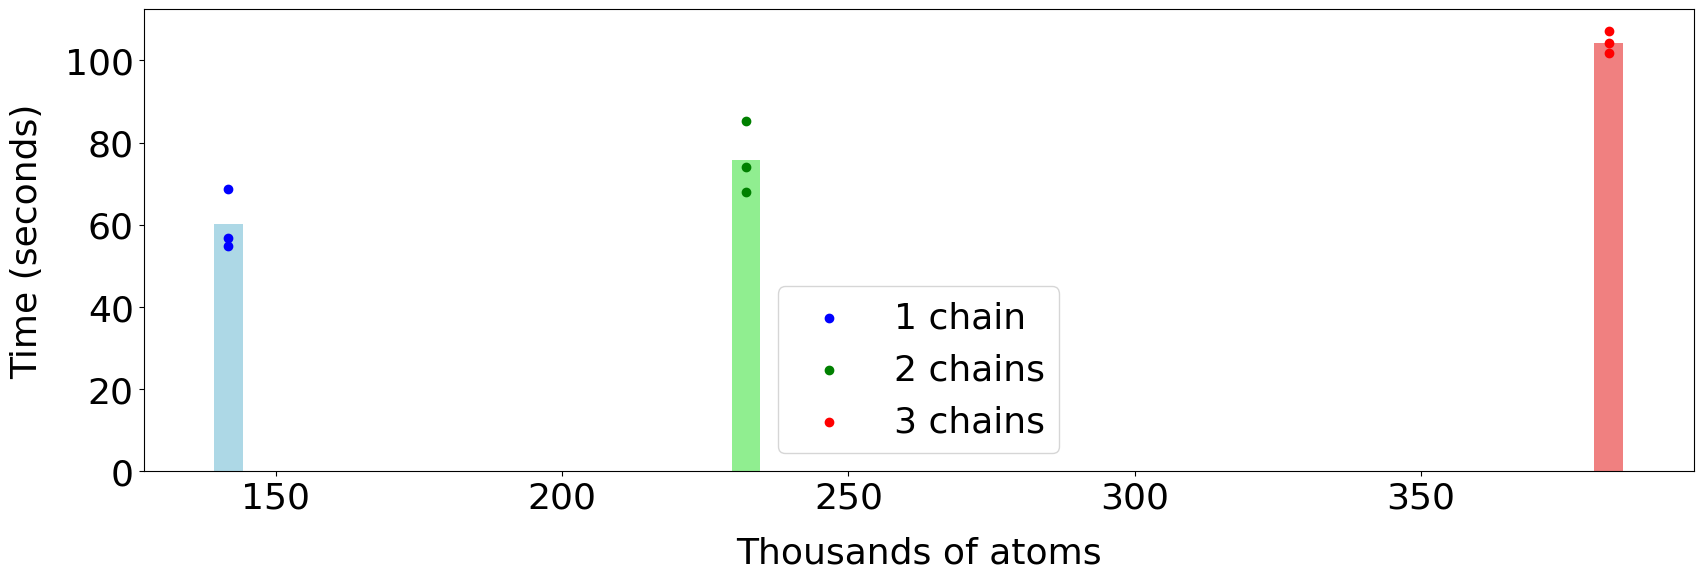

In [26]:
plt.figure(figsize=(20, 6))

# Plot the bar chart
plt.bar(x_positions, averages, color=['lightblue', 
                                      'lightgreen',
                                      'lightcoral'], width=5)

# Overlay scatter plots for each group
plt.scatter([x_positions[0]]*len(segname_PROA), segname_PROA, 
            color='blue', label='1 chain')
plt.scatter([x_positions[1]]*len(segname_PROA_PROC), 
            segname_PROA_PROC, 
            color='green', label='2 chains')
plt.scatter([x_positions[2]]*len(segname_PROA_PROC_PROH), 
            segname_PROA_PROC_PROH, 
            color='red', label='3 chains')

# Label axes
plt.xlabel('Thousands of atoms', fontsize=26, labelpad=15)
plt.ylabel('Time (seconds)', fontsize=26, labelpad=15)

 # Increase the font size of y-axis values
plt.yticks(fontsize=26) 
plt.xticks(fontsize=26)
plt.legend(fontsize=26)

To perform the linear regression, we first reshape the data:

In [27]:
y = np.vstack((segname_PROA, segname_PROA_PROC,
               segname_PROA_PROC_PROH)).reshape(-1, 1)
x = np.repeat(x_positions, n_times).reshape(-1, 1)

In [28]:
y

array([[ 68.62],
       [ 54.79],
       [ 56.86],
       [ 85.34],
       [ 68.01],
       [ 74.02],
       [104.15],
       [107.01],
       [101.74]])

In [29]:
x

array([[141.719],
       [141.719],
       [141.719],
       [232.124],
       [232.124],
       [232.124],
       [382.788],
       [382.788],
       [382.788]])

Next, we can do the regression itself:

In [30]:
linearReg = LinearRegression()
linearReg.fit(x, y)

LinearRegression()

In [31]:
print('intercept: ', linearReg.intercept_)

intercept:  [33.65656491]


In [32]:
print('slope: ', linearReg.coef_)

slope:  [[0.18398705]]


In [33]:
print('equation is y = {:5.3f} x + {:5.3f}'.format(
    linearReg.coef_[0][0], linearReg.intercept_[0]))

equation is y = 0.184 x + 33.657


We can also predict points to plot a line graph on top of our previous graph, giving us something similar to Figure S12:

In [34]:
predictions = linearReg.predict(x_positions.reshape(-1,1))

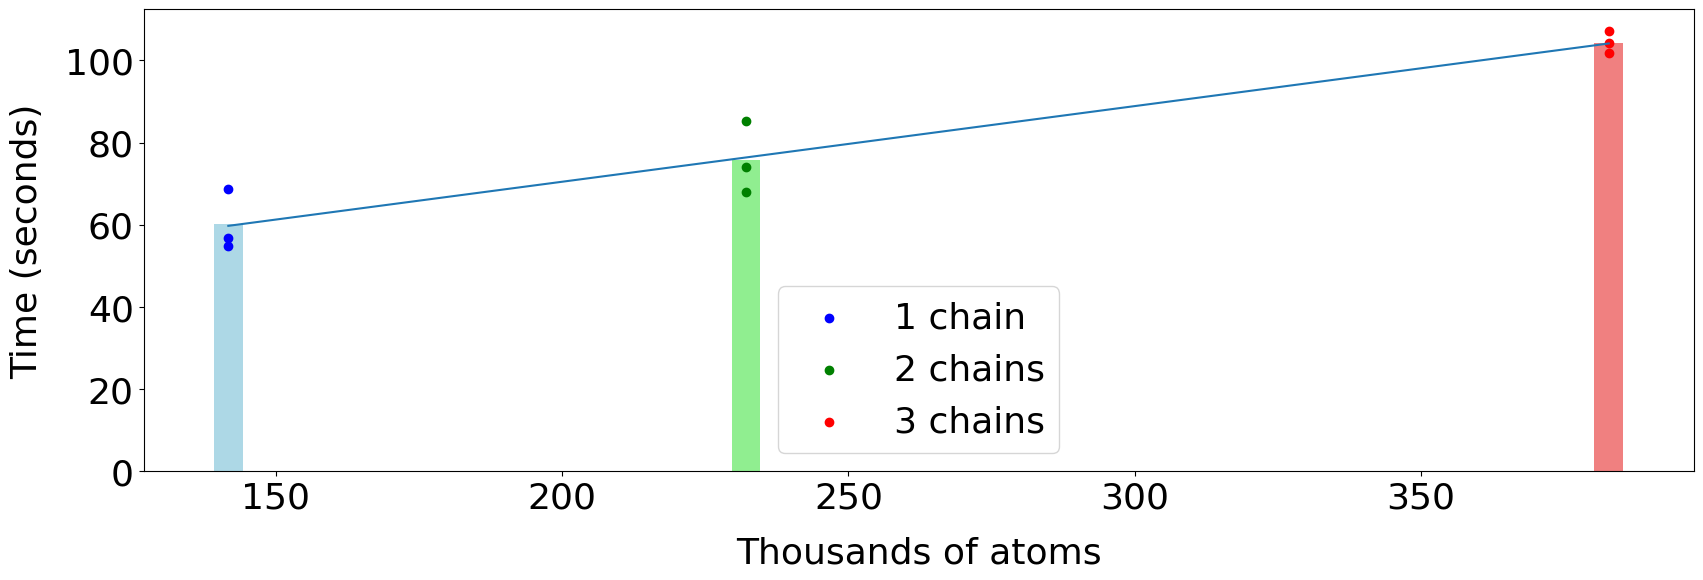

In [35]:
plt.figure(figsize=(20, 6))

# Plot the bar chart
plt.bar(x_positions, averages, color=['lightblue', 
                                      'lightgreen',
                                      'lightcoral'], width=5)

# Overlay scatter plots for each group
plt.scatter([x_positions[0]]*len(segname_PROA), segname_PROA, 
            color='blue', label='1 chain')
plt.scatter([x_positions[1]]*len(segname_PROA_PROC), 
            segname_PROA_PROC, 
            color='green', label='2 chains')
plt.scatter([x_positions[2]]*len(segname_PROA_PROC_PROH), 
            segname_PROA_PROC_PROH, 
            color='red', label='3 chains')

# Label axes
plt.xlabel('Thousands of atoms', fontsize=26, labelpad=15)
plt.ylabel('Time (seconds)', fontsize=26, labelpad=15)

 # Increase the font size of y-axis values
plt.yticks(fontsize=26) 
plt.xticks(fontsize=26)
plt.legend(fontsize=26)

plt.plot(x_positions, predictions.flatten())

## 4. First analysis of the results

First let's look at the results that we have. 

We have 3 sets of calculations of water bridge interactions, corresponding to the 3 selections.

In [36]:
len(interactions_all)

3

Each of these sets has 3 calculations in it.

In [37]:
[len(calculations_set) for calculations_set in interactions_all]

[3, 3, 3]

We can separate these back out as follows:

In [38]:
set_1chain, set_2chain, set_3chain = interactions_all

In [39]:
[len(results) for results in set_1chain]

[10, 10, 10]

If we calculate the total number of water bridges across the results of each calculation, we should see that they are the same.

In [40]:
[sum([len(interactions) for interactions in results]) 
 for results in set_1chain]

[7749, 7749, 7749]

Therefore, we can focus on the first calculation for each selection.

In [41]:
results = {}
results['1chain'] = interactions_all[0][0]
results['2chain'] = interactions_all[1][0]
results['3chain'] = interactions_all[2][0]

We can again make a summary the total number of water bridge interactions and have a sanity check that this increases.

In [42]:
np.mean([len(interactions) for interactions in results['1chain']])

774.9

In [43]:
np.mean([len(interactions) for interactions in results['2chain']])

1092.4

In [44]:
np.mean([len(interactions) for interactions in results['3chain']])

2060.7

In [45]:
selections = {}
selections['1chain'] = selections_all[0][0]
selections['2chain'] = selections_all[1][0]
selections['3chain'] = selections_all[2][0]

In [46]:
selections

{'1chain': <Selection: 'index 0 to 11 1...8 707025 707029' from 4a0v_all_sci (141719 atoms)>,
 '2chain': <Selection: 'index 0 to 11 1...5 707029 707039' from 4a0v_all_sci (232124 atoms)>,
 '3chain': <Selection: 'index 0 to 11 1...07039 to 707040' from 4a0v_all_sci (382788 atoms)>}

In [47]:
trajectory.setAtoms(coords_traj)
trajectory

<Ensemble: TricCCT_D2_4a0v_25ns_ev100th (0:50:1) (50 conformations; 707044 atoms)>

In [48]:
trajectories = {}
for key, selection in selections.items():
    trajectories[key] = trajectory[:]
    trajectories[key].setAtoms(selection)
trajectories

{'1chain': <Ensemble: TricCCT_D2_4a0v_25ns_ev100th (0:50:1) (0:50:1) (50 conformations; selected 141719 of 707044 atoms)>,
 '2chain': <Ensemble: TricCCT_D2_4a0v_25ns_ev100th (0:50:1) (0:50:1) (50 conformations; selected 232124 of 707044 atoms)>,
 '3chain': <Ensemble: TricCCT_D2_4a0v_25ns_ev100th (0:50:1) (0:50:1) (50 conformations; selected 382788 of 707044 atoms)>}

In [51]:
trajectory

<Ensemble: TricCCT_D2_4a0v_25ns_ev100th (0:50:1) (50 conformations; 707044 atoms)>

With such results, we can now look at the top 400 water bridging residues and the total number of residues involved in water bridging in water bridging in multiple frames.

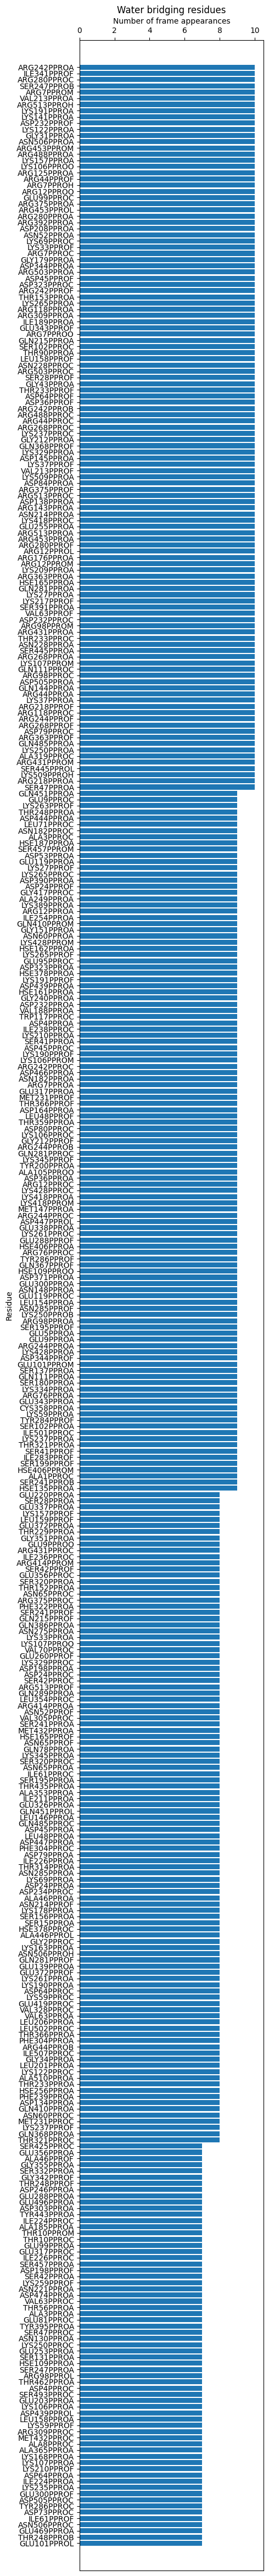

In [52]:
hist1 = calcBridgingResiduesHistogram(results['1chain'],
                                      show_plot=True,
                                      clip=400, use_segname=True)

In [53]:
len(hist1)

970

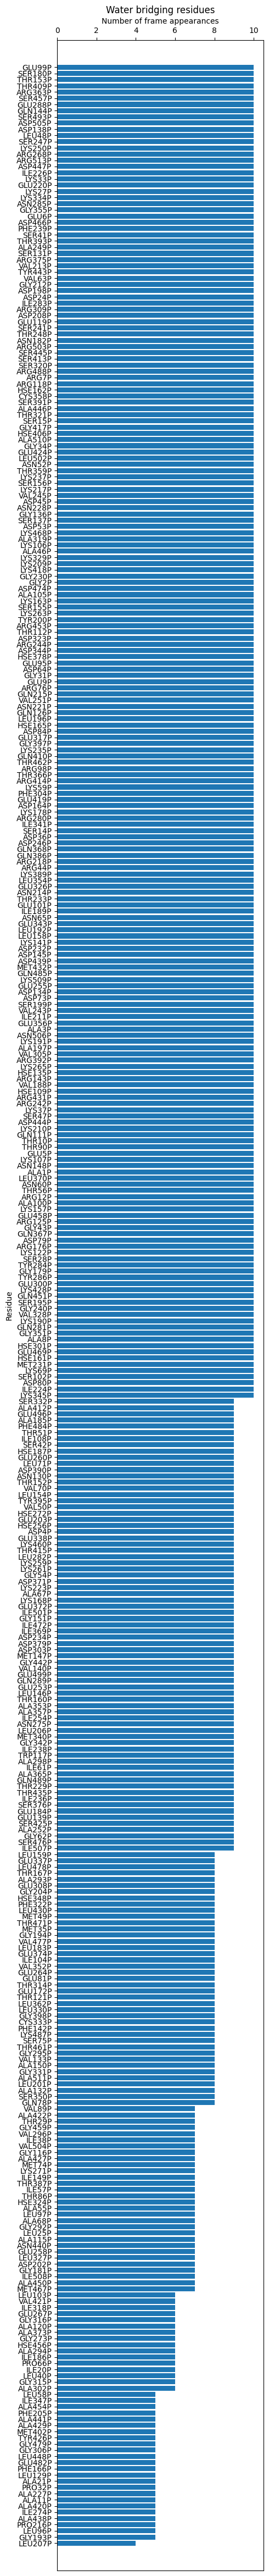

In [54]:
hist2 = calcBridgingResiduesHistogram(results['2chain'],
                                      show_plot=True,
                                      clip=400)

In [55]:
len(hist2)

477

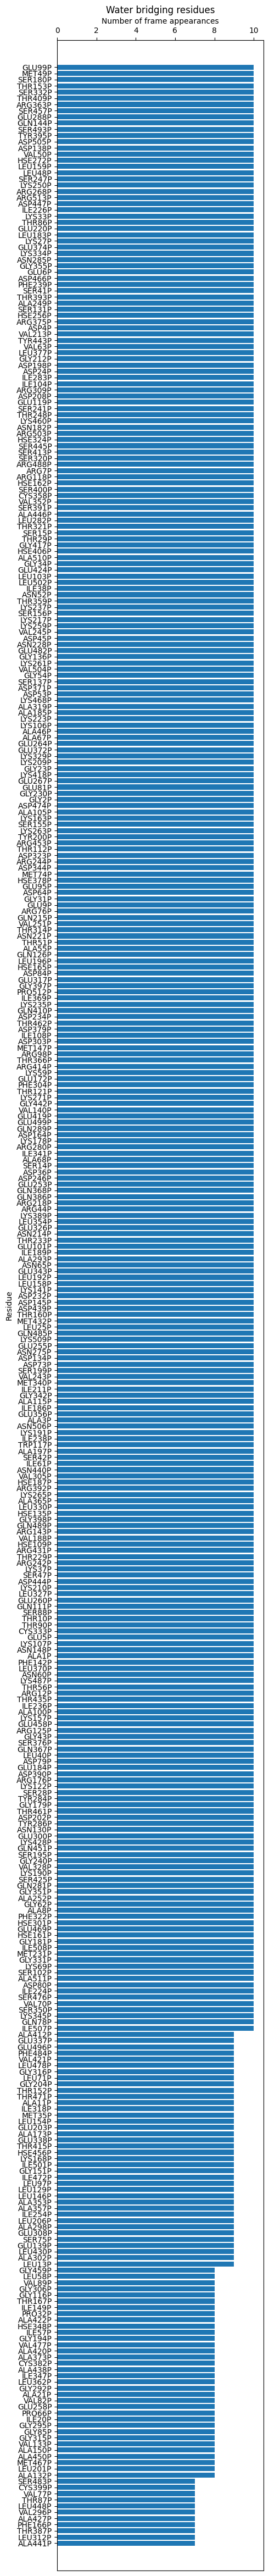

In [56]:
hist3 = calcBridgingResiduesHistogram(results['3chain'],
                                      show_plot=True,
                                      clip=400)

In [57]:
len(hist3)

490

## 5. Finding clusters

We can now use a similar approach to look at how long it takes to find water clusters in each of these sets of water bridge interactions from 10 frames and how the timing and results are affected by different parameters.

We start by saving sets of pdb files with the bridging water molecules for each trajectory analysis.

As in other cases, we provide a general filename that will be clipped at .pdb to insert the frame number, but we put each set of results in its own folder.

In [58]:
times_savePDB = []

import os
for folderName in ['1chain', '2chain', '3chain']:
    if not os.path.exists(folderName):
        os.mkdir(folderName)
        
    start_time = time.time()
    savePDBWaterBridgesTrajectory(results[folderName], selections[folderName], 
                                  filename=os.path.join(folderName,
                                                        '4a0v_all_sci_multi.pdb'), 
                                  trajectory=trajectories[folderName])
    calc_time = time.time() - start_time
    times_savePDB.append(calc_time)

We can again look at the timings for this stage.

In [59]:
times_savePDB

[28.71800208091736, 60.34501814842224, 168.92481017112732]

In [60]:
x_positions

array([141.719, 232.124, 382.788])

(array([100., 150., 200., 250., 300., 350., 400.]),
 [Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400')])

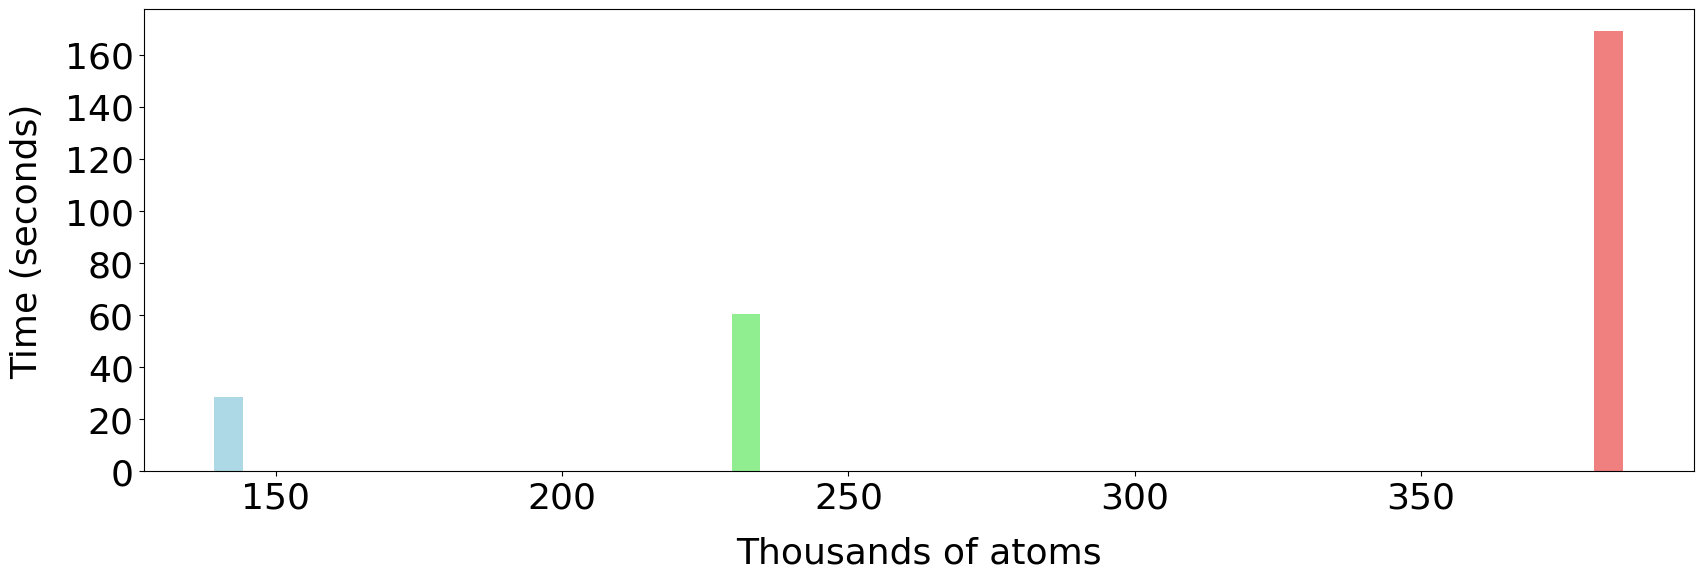

In [61]:
plt.figure(figsize=(20, 6))

# Plot the bar chart
plt.bar(x_positions, times_savePDB, color=['lightblue',
                                           'lightgreen',
                                           'lightcoral'], width=5)

# Label axes
plt.xlabel('Thousands of atoms', fontsize=26, labelpad=15)
plt.ylabel('Time (seconds)', fontsize=26, labelpad=15)

 # Increase the font size of y-axis values
plt.yticks(fontsize=26) 
plt.xticks(fontsize=26)

In [62]:
np.array(times_savePDB)/x_positions

array([0.20264045, 0.25996889, 0.44130122])

Here we see that it is not linear with bigger systems taking much more time.

Next we move on to the find cluster centers step:

In [63]:
folderName = '1chain'
infilename = os.path.join(folderName, '4a0v_all_sci_multi_*.pdb')

distC = 0.6
numC = 2

outfilename = os.path.join(folderName, '4a0v_all_sci_{0}_{1}.pdb'.format(distC, numC))
findClusterCenters(infilename, distC=distC, numC=numC, filename=outfilename)


@> 19931 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> Results are saved in 1chain/4a0v_all_sci_0.6_2.pdb.


In [64]:
folderName = '1chain'
infilename = os.path.join(folderName, '4a0v_all_sci_multi_*.pdb')

distC = 0.6
numC = 3

outfilename = os.path.join(folderName, '4a0v_all_sci_{0}_{1}.pdb'.format(distC, numC))
findClusterCenters(infilename, distC=distC, numC=numC, filename=outfilename)


@> 19931 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.16s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.13s.


ValueError: No waters were selected. You may need to align your trajectory

In [65]:
times_clusters = {}

import os
for folderName in ['1chain', '2chain', '3chain']:
    infilename = os.path.join(folderName, '4a0v_all_sci_multi_*.pdb')
    
    
    for distC in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 2., 3.]:
        for numC in range(2, 10):
            outfilename = os.path.join(folderName, '4a0v_all_sci_{0}_{1}.pdb'.format(distC, numC))

            try:
                start_time = time.time()
                findClusterCenters(infilename, distC=distC, numC=numC, filename=outfilename)
                calc_time = time.time() - start_time
                times_clusters['{0}_{1}_{2}'.format(folderName, distC, numC)] = calc_time
            except:
                pass

@> 19931 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20179 atoms and 1 coo

@> 20183 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20054 atoms and 1 coo

@> 20177 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20183 atoms and 1 coo

@> 20069 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> Results are saved in 1chain/4a0v_all_sci_0.6_2.pdb.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20102 atoms and 1 coordinat

@> 20183 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20054 atoms and 1 coo

@> 20183 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> Results are saved in 1chain/4a0v_all_sci_0.9_4.pdb.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 19931 atoms and 1 coordinat

@> 20179 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> Results are saved in 1chain/4a0v_all_sci_2.0_2.pdb.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20054 atoms and 1 coordinat

@> 19931 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.13s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20183 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20179 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20021 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20102 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20177 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> Results are saved in 1chain/4a0v_all_sci_3.0_6.pdb.
@> 19931 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20054 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20091 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20069 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20027 atoms and 1 coordinate set(s) were parsed in 0.14s.
@> 20183 atoms and 1 coordinat

@> 28049 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28093 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28205 atoms and 1 coordinate set(s) were parsed in 0.23s.
@> 28078 atoms and 1 coordinate set(s) were parsed in 0.21s.
@> 27998 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28070 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28215 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27830 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28049 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28093 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28205 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28078 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27998 atoms and 1 coo

@> 28078 atoms and 1 coordinate set(s) were parsed in 0.22s.
@> 27998 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28070 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28215 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27830 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28049 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28093 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28205 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28078 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27998 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28070 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28215 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27830 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28049 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28093 atoms and 1 coo

@> 28215 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27830 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28049 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28093 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28205 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28078 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27998 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28070 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28215 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27830 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28049 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28093 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28205 atoms and 1 coo

@> 28093 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28205 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28078 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27998 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28070 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28215 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> Results are saved in 2chain/4a0v_all_sci_0.7_3.pdb.
@> 27830 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28049 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28093 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28205 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28078 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27998 atoms and 1 coordinat

@> 28034 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28205 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28078 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27998 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28070 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28215 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27830 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28049 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28093 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28205 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28078 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27998 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28070 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28215 atoms and 1 coo

@> 28093 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28205 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28078 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27998 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28070 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28215 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> Results are saved in 2chain/4a0v_all_sci_1.0_5.pdb.
@> 27830 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28049 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28093 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28205 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28078 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27998 atoms and 1 coordinat

@> Results are saved in 2chain/4a0v_all_sci_2.0_9.pdb.
@> 27830 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28049 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28093 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27989 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28205 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28078 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 27998 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28070 atoms and 1 coordinate set(s) were parsed in 0.19s.
@> 28215 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> Results are saved in 2chain/4a0v_all_sci_3.0_2.pdb.
@> 27830 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28049 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28093 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 28034 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> 27989 atoms and 1 coordinate set(

@> 51267 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51117 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51235 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51365 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51252 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51312 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51567 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.32s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51117 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51235 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51365 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51252 atoms and 1 coo

@> 51235 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51365 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51252 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51312 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51567 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51117 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51235 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51365 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51252 atoms and 1 coordinate set(s) were parsed in 0.32s.
@> 51312 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51567 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51267 atoms and 1 coo

@> 51312 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51567 atoms and 1 coordinate set(s) were parsed in 0.35s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.36s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.35s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.35s.
@> 51117 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51235 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51365 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51252 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51312 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51567 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.35s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> Results are saved in 

@> 51567 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51117 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51235 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51365 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51252 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51312 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51567 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51117 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51235 atoms and 1 coo

@> 51470 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> Results are saved in 3chain/4a0v_all_sci_0.8_3.pdb.
@> 51117 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51235 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51365 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51252 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51312 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51567 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> Results are saved in 3chain/4a0v_all_sci_0.8_4.pdb.
@> 51117 atoms and 1 coordinate set(

@> 51470 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51117 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51235 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51365 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51252 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51312 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51567 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51117 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51235 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51365 atoms and 1 coo

@> 51312 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51567 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.32s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> Results are saved in 3chain/4a0v_all_sci_2.0_5.pdb.
@> 51117 atoms and 1 coordinate set(s) were parsed in 0.32s.
@> 51235 atoms and 1 coordinate set(s) were parsed in 0.32s.
@> 51365 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51252 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51312 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51567 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51487 atoms and 1 coordinat

@> 51312 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51567 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51470 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51267 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> 51339 atoms and 1 coordinate set(s) were parsed in 0.34s.
@> 51487 atoms and 1 coordinate set(s) were parsed in 0.33s.
@> Results are saved in 3chain/4a0v_all_sci_3.0_9.pdb.


In [66]:
times_clusters

{'1chain_0.4_2': 3.003004550933838,
 '1chain_0.5_2': 2.988089084625244,
 '1chain_0.6_2': 4.254481315612793,
 '1chain_0.7_2': 3.0228781700134277,
 '1chain_0.7_3': 3.053689479827881,
 '1chain_0.8_2': 3.037456512451172,
 '1chain_0.8_3': 3.022857666015625,
 '1chain_0.8_4': 3.0361053943634033,
 '1chain_0.9_2': 3.05253529548645,
 '1chain_0.9_3': 3.0302929878234863,
 '1chain_0.9_4': 3.056368112564087,
 '1chain_1.0_2': 3.0861546993255615,
 '1chain_1.0_3': 3.0441479682922363,
 '1chain_1.0_4': 3.115015745162964,
 '1chain_2.0_2': 2.8717892169952393,
 '1chain_2.0_3': 2.947374105453491,
 '1chain_2.0_4': 3.0326900482177734,
 '1chain_2.0_5': 3.1628077030181885,
 '1chain_2.0_6': 3.1465916633605957,
 '1chain_2.0_7': 3.1459085941314697,
 '1chain_2.0_8': 3.134878158569336,
 '1chain_2.0_9': 4.187976360321045,
 '1chain_3.0_2': 2.4508278369903564,
 '1chain_3.0_3': 2.637803077697754,
 '1chain_3.0_4': 2.7424814701080322,
 '1chain_3.0_5': 2.8141214847564697,
 '1chain_3.0_6': 2.974381685256958,
 '1chain_3.0_7':